In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from spectral import imshow, view_cube
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import cv2 as cv
import spectral.io.envi as envi

Header parameter names converted to lower case.
Header parameter names converted to lower case.
Header parameter names converted to lower case.


ImageView object:
  Display bands       :  (64, 55, 19)
  Interpolation       :  <default>
  RGB data limits     :
    R: [220.0, 292.0]
    G: [219.0, 284.0]
    B: [208.0, 243.0]

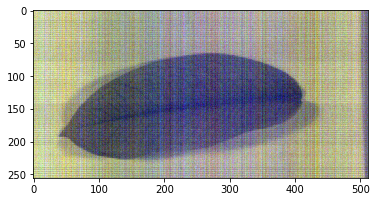

In [3]:
dark_ref = envi.open('../datasets/bisbul/DARK_REF_2/capture/DARK_REF_2.hdr', '../datasets/bisbul/DARK_REF_2/capture/DARK_REF_2.raw')
white_ref = envi.open('../datasets/bisbul/WHITE_REF_2/capture/WHITE_REF_2.hdr', '../datasets/bisbul/WHITE_REF_2/capture/WHITE_REF_2.raw')
data_ref = envi.open('../datasets/bisbul/BISBUL/capture/BISBUL.hdr', '../datasets/bisbul/BISBUL/capture/BISBUL.raw')

#imshow(data_ref, (110, 5, 18))
white_nparr = np.array(white_ref.load())
dark_nparr = np.array(dark_ref.load())
data_nparr = np.array(data_ref.load())

imshow(data_nparr, (64, 55, 19))

In [4]:
corrected_nparr = np.divide(
    np.subtract(data_nparr, dark_nparr), 
    np.subtract(white_nparr, dark_nparr))

ImageView object:
  Display bands       :  (32, 32, 32)
  Interpolation       :  <default>
  RGB data limits     :
    R: [-2.25, 3.6666667461395264]
    G: [-2.25, 3.6666667461395264]
    B: [-2.25, 3.6666667461395264]

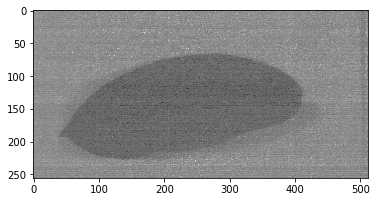

In [5]:
imshow(corrected_nparr, (32, 32, 32))

ImageView object:
  Display bands       :  (100, 100, 100)
  Interpolation       :  <default>
  RGB data limits     :
    R: [-0.08474576473236084, 1.3396226167678833]
    G: [-0.08474576473236084, 1.3396226167678833]
    B: [-0.08474576473236084, 1.3396226167678833]

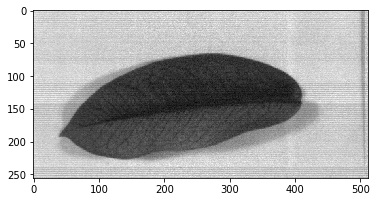

In [6]:
imshow(corrected_nparr, (100, 100, 100))

ImageView object:
  Display bands       :  (200, 200, 200)
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.3611111044883728, 1.7599999904632568]
    G: [0.3611111044883728, 1.7599999904632568]
    B: [0.3611111044883728, 1.7599999904632568]

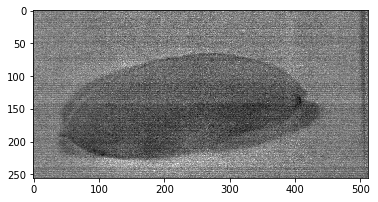

In [7]:
imshow(corrected_nparr, (200, 200, 200))

In [8]:
from numpy import genfromtxt

bands = genfromtxt('./helpers/bands.csv', delimiter=',')

In [9]:
leaf_pixel_y = 125
leaf_pixel_x = 200
teflon_pixel_y = 30
teflon_pixel_x = 450

leaf_pixel = corrected_nparr[
    leaf_pixel_y:leaf_pixel_y+1, 
    leaf_pixel_x:leaf_pixel_x+1, 
    :]
teflon_pixel = corrected_nparr[
    teflon_pixel_y:teflon_pixel_y+1, 
    teflon_pixel_x:teflon_pixel_x+1, 
    :]

leaf_pixel_squeezed = np.squeeze(leaf_pixel)
teflon_pixel_squeezed = np.squeeze(teflon_pixel)

In [48]:
image = corrected_nparr[:,:,] / 2 * 255
conv_im = image.astype('uint8')
conv_im

array([[142, 147, 145, ..., 132, 139, 141],
       [130, 133, 137, ..., 135, 122, 130],
       [153, 154, 151, ..., 142, 135, 140],
       ...,
       [149, 145, 152, ..., 137, 145, 150],
       [140, 146, 149, ..., 136, 132, 127],
       [124, 126, 130, ..., 110, 118, 116]], dtype=uint8)

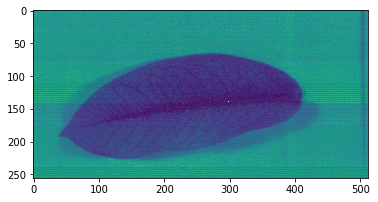

In [53]:
plt.imshow(conv_im)

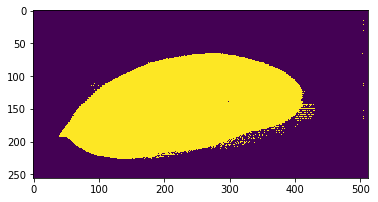

In [52]:
ret, thresh = cv.threshold(conv_im,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
plt.imshow(thresh)

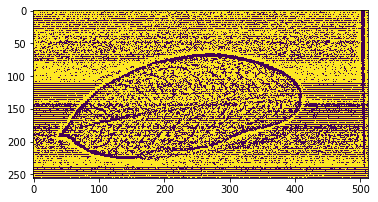

In [68]:
thresh_gauss = cv.adaptiveThreshold(conv_im,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,11,2)
plt.imshow(thresh_gauss)